# Análisis del riesgo de incumplimiento de los prestatarios

El proyecto consiste en preparar un informe para la división de préstamos de un banco. Averiguaré si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

El informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abro-el-archivo-de-datos-y-miro-la-información-general." data-toc-modified-id="Abro-el-archivo-de-datos-y-miro-la-información-general.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abro el archivo de datos y miro la información general.</a></span></li><li><span><a href="#Ejercicio-1.-Exploración-de-datos" data-toc-modified-id="Ejercicio-1.-Exploración-de-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejercicio 1. Exploración de datos</a></span><ul class="toc-item"><li><span><a href="#Conclusión-intermedia" data-toc-modified-id="Conclusión-intermedia-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusión intermedia</a></span></li><li><span><a href="#Conclusión-intermedia" data-toc-modified-id="Conclusión-intermedia-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conclusión intermedia</a></span></li></ul></li><li><span><a href="#Transformación-de-datos" data-toc-modified-id="Transformación-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformación de datos</a></span><ul class="toc-item"><li><span><a href="#Restaurando-valores-ausentes-en-total_income" data-toc-modified-id="Restaurando-valores-ausentes-en-total_income-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Restaurando valores ausentes en <code>total_income</code></a></span></li><li><span><a href="#Restaurando-valores-en-days_employed" data-toc-modified-id="Restaurando-valores-en-days_employed-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Restaurando valores en <code>days_employed</code></a></span></li></ul></li><li><span><a href="#Clasificación-de-datos" data-toc-modified-id="Clasificación-de-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clasificación de datos</a></span></li><li><span><a href="#Comprobación-de-las-hipótesis" data-toc-modified-id="Comprobación-de-las-hipótesis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comprobación de las hipótesis</a></span></li></ul></div>

## Abro el archivo de datos y miro la información general. 

In [1]:
# Cargamos todas las librerías a utilizar
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargamos los datos
data=pd.read_csv('/datasets/credit_scoring_eng.csv')

## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

In [3]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos
data.shape

(21525, 12)

In [4]:
# vamos a mostrar las primeras filas 10
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


De los datos anteriores se puede apreciar que el DataFrame tiene ***21525 filas y 12 columnas***. Analizando las primera 10 filas se ve que en la columna `days_employee` hay datos negativos que hay que revisar y en otras columnas distintos formatos de escritura (mayusculas y minusculas).

In [5]:
# Obtenemos información sobre los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Hay dos columnas que tienen datos nulos en su interior, como es el caso de: `days_employed` con filas 19351 no nulas y `total_income` con 19351 no nulas.

In [6]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
data[data['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Tanto la columna `days_employed` como la columna `total_income` posee la misma cantidad de datos nulos por lo que al parecer los valores ausentes son simetricos. A primera vista, tras filtrar por valores nulos de `days_employed` pareciera ser que cuando `days_employed` es un valor nulo, `total_income` tambien lo es. Sin embargo, es necesario implementar algunos filtros mas para corroborar esta hipotesis.

In [7]:
# Aplicamos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.
data_nulos=data[data['days_employed'].isnull() & data['total_income'].isnull()]

print(f"Filas de tabla filtrada: {len(data_nulos)}")

Filas de tabla filtrada: 2174


In [8]:
#Porcentaje de filas con datos nulos respecto a las filtas totales
print(f"Porcentaje de filas con datos nulos respecto a las filtas totales: {len(data_nulos)*100/len(data):.2f}%")

Porcentaje de filas con datos nulos respecto a las filtas totales: 10.10%


### Conclusión intermedia

Tras filtrar valores nulos en la fila `days_employed` y en la fila `total_income` al mismo tiempo obtenemos la misma cantidad de filas que antes, por lo que podemos concluir que nuestra suposicion anterior era correcta y que en todos los casos de nuestro DataFrame, **estos valores nulos aparecen simultaneamente.**

El porcentaje de valores ausentes es de 10.1% lo cual es una porcion significativa de la muestra. Con respecto al porque estos datos son nulos, puede ser debido a un problema técnico u otro tipo.

De momento, en base a lo concluido anteriormente estaría tentado a reemplazar estos datos ausentes con 0, pero antes, analizaré mejor los datos ausentes evaluando su distribución por categoria a ver si encuentro algo mas.

In [9]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes
data_nulos.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


In [10]:
# Función para comprobar la distribución (de datos ausentes)
def dist_data(df,columna):
    temp_df=df[columna].value_counts(normalize=True)
    temp_df=temp_df.apply(lambda x: '{:.2%}'.format(x))
    display(temp_df.to_frame())

In [11]:
columnas_analizar = ['debt', 'education_id', 'family_status', 'income_type']
for col in columnas_analizar:
    dist_data(data_nulos, col)  

,debt
0,92.18%
1,7.82%


,education_id
1,70.84%
0,25.02%
2,3.17%
3,0.97%


,family_status
married,56.90%
civil partnership,20.33%
unmarried,13.25%
divorced,5.15%
widow / widower,4.37%


,income_type
employee,50.83%
business,23.37%
retiree,19.00%
civil servant,6.76%
entrepreneur,0.05%


Analizando la distribución de datos ausentes por distintas categorias podemos apreciar que el mayor porcentaje de estos (~71%) correponden a personas con educación secundaria, el 57% a personas casadas y el 50% a personas empleadas.

En base a lo anterior, ***no se aprecia algún tipo de patron en los datos ausentes***. A continuación analizaré la distribución del conjunto completo para ver si existen diferencias.

In [12]:
# Comprobando la distribución en el conjunto de datos entero vs la distribución filtrada

def dist_data(df,df2,columna):
    temp_df=df[columna].value_counts(normalize=True)
    temp_df=temp_df.apply(lambda x: '{:.2%}'.format(x))
    
    temp_df2=df2[columna].value_counts(normalize=True)
    temp_df2=temp_df2.apply(lambda x: '{:.2%}'.format(x))
    
    temp_df= pd.concat([temp_df,temp_df2], axis=1, keys=[columna, columna + ' filtrada'])

    display(temp_df)

In [13]:
columnas_analizar = ['debt', 'education_id', 'family_status', 'income_type']
for col in columnas_analizar:
    dist_data(data_nulos, data, col)  

,debt,debt filtrada
0,92.18%,91.91%
1,7.82%,8.09%


,education_id,education_id filtrada
0,25.02%,24.44%
1,70.84%,70.77%
2,3.17%,3.46%
3,0.97%,1.31%
4,NaN,0.03%


,family_status,family_status filtrada
married,56.90%,57.51%
civil partnership,20.33%,19.41%
unmarried,13.25%,13.07%
divorced,5.15%,5.55%
widow / widower,4.37%,4.46%


,income_type,income_type filtrada
employee,50.83%,51.66%
business,23.37%,23.62%
retiree,19.00%,17.91%
civil servant,6.76%,6.78%
entrepreneur,0.05%,0.01%
unemployed,NaN,0.01%
student,NaN,0.00%
paternity / maternity leave,NaN,0.00%


### Conclusión intermedia

Comparando el conjunto de datos filtrados por nulos con el conjunto de datos completo se aprecia una distribución de datos muy similar. Con esto se concluye que ***no hay una correlación aparente para los datos nulos. ***

## Transformación de datos

En en analisis de los puntos anteriores, se puede ver a primera vista que existen diferencias de formato al momento de indicar el nivel educacional en la columna `education`. Por este motivo, consultaré por valores unicos en esta columna y estandarizaré de ser necesario.

In [14]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [15]:
#Hay algunos valores en mayuscula y otros en minuscula, los transformaré todos en minuscula
data['education']=data['education'].str.lower()

#Transfomo los espacios a "_" y las comillas las elimino 
#para estandarizar el texto en formato snake_case
data['education']=data['education'].str.replace(' ', '_')
data['education']=data['education'].str.replace('\'', '')

In [16]:
# Comprobamos todos los valores en la columna para asegurarnos de que los hayamos corregido
data['education'].unique()

array(['bachelors_degree', 'secondary_education', 'some_college',
       'primary_education', 'graduate_degree'], dtype=object)

Ahora vamos a analizar los datos unicos de la columna `children`

In [17]:
# Veamos la distribución de los valores en la columna `children`
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Analizando los datos unicos en `children` se aprecia un -1, lo cual no tiene sentido. Vamos a analizar cuantas filas del DF registran esta caracteristica usando el metodo "value_counts()".

In [18]:
temp_df=data['children'].value_counts()
temp_df2=(data['children'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)


,children,children
0,14149,65.73%
1,4818,22.38%
2,2055,9.55%
3,330,1.53%
20,76,0.35%
-1,47,0.22%
4,41,0.19%
5,9,0.04%


Hay 47 filas con -1 children lo cual es el 0.22% de las filas totales, y no solo eso, ademas hay 76 filas(0.35%) con 20 children, esto no es normal, podria ser que un numero pequeño de personas de la muestra tenga 20 hijos, pero no 76, ademas, justo 20, no 19 o 21. ***Probablemente estos dos casos corresponden a errores de tipeo, en donde seguramente el -1 corresponde a 1 y el 20 corresponde a 2.***

***Procederé a modificar estas cifras erroneas***

In [19]:
#Corrigiendo datos erroneos
data['children'].replace(-1,1, inplace=True)
data['children'].replace(20,2, inplace=True)

In [20]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado
temp_df=data['children'].value_counts()
temp_df2=(data['children'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)


,children,children
0,14149,65.73%
1,4865,22.60%
2,2131,9.90%
3,330,1.53%
4,41,0.19%
5,9,0.04%


***Las filas con valores -1 y 20 en la columna 'children' del DataFrame fueron eliminadas satisfactoriamente.***

Ahora procederé a analizar `days_employed` (experiencia), pero dado que esta en una variable númerica flotante que puede tomar muchos valores distintos, en vez de usar value_counts, usaré un histograma.

<AxesSubplot:>

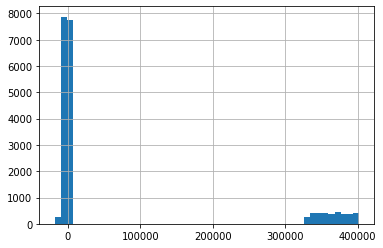

In [21]:
# Histograma
data['days_employed'].hist(bins=50)

En el histograma anterior se ven dos rangos en el que se focalizan los datos y en el rango inferior, aparentemente hay valores negativos, analizaré mas de cerca estos datos.

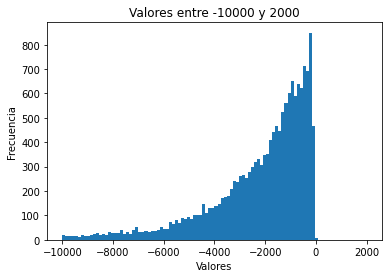

In [22]:
#Histograma entre -10000 y 2000

plt.hist(data['days_employed'], bins=100, range=(-10000,2000))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Valores entre -10000 y 2000')
plt.savefig('histograma.png')

<AxesSubplot:>

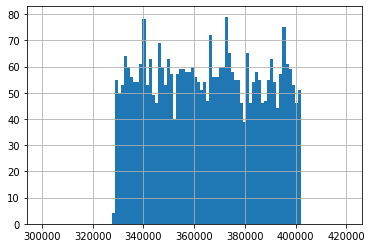

In [23]:
#Histograma entre 300000 y 420000
data['days_employed'].hist(bins=100, range=(300000,420000))

***Veamos a que porcentaje de los datos corresponden cada uno de estos rangos, incluyendo los nulos***

In [24]:
#Contamos todas las filas menores que 0 y la almacenamos en la variable temporal "temp"
temp= data[data['days_employed']<2000]['days_employed'].count()
#Calculamos el porcentaje del total
temp=(temp/len(data))*100
print(f"Porcentaje rango menor que 0: {temp:.2f}%")

#Guardo info en DataFrame temporal
temp_df=pd.DataFrame({'Menor que 0':[temp]})

Porcentaje rango menor que 0: 73.90%


In [25]:
#Contamos todas las filas mayores a 300000 y la almacenamos en la variable temporal "temp"
temp= data[data['days_employed']>300000]['days_employed'].count()
#Calculamos el porcentaje del total
temp=(temp/len(data))*100
print(f"Porcentaje rango mayor a 300.000: {temp:.2f}%")

#Guardo info en DataFrame temporal
temp_df2=pd.DataFrame({'Mayor que 300.000':[temp]})
temp_df=pd.concat([temp_df,temp_df2],axis=1)

Porcentaje rango mayor a 300.000: 16.00%


In [26]:
#Contamos valores nulos
temp= data['days_employed'].isnull().sum()

#Calculamos el porcentaje del total
temp=(temp/len(data))*100
print(f"Porcentaje valores nulos: {temp:.2f}%")

#Guardo info en DataFrame temporal, calculo el total y muestro tabla resumen
temp_df2=pd.DataFrame({'Valores nulos':[temp]})
temp_df=pd.concat([temp_df,temp_df2],axis=1)
temp_df2=pd.DataFrame({'Total':[temp_df.iloc[0,0]+temp_df.iloc[0,1]+temp_df.iloc[0,2]]})
temp_df=pd.concat([temp_df,temp_df2],axis=1)
temp_df

Porcentaje valores nulos: 10.10%


,Menor que 0,Mayor que 300.000,Valores nulos,Total
0,73.89547,16.004646,10.099884,100.0


La columna `days_employed` debería reflejar la cantidad de días trabajados(experiencia laboral). A primera vista, podriamos pensar que todos los valores negativos son datos erroneos dado que no es posible trabajar un número negativo de días, pero luego, al analizar el segundo rango, vemos que aquí los días trabajados estan todos sobre 300.000 (822 años). Con esto podrímos concluir que todos los datos de esta columnas son erroneos.

![Histograma de datos aleatorios](histograma.png)

***Sin embargo, tras analizar nuevamente los datos negativos vemos que la distribución de datos es similar a la distribución normal (muchos valores cercanos al 0 y decreciendo paulatinamente mientras menor es el número).Considerando ademas que los valores de este rango correponden al (74%) de los datos totales podriamos concluir que tal vez estos son los datos correctos, por otro lado, lo valores mayores a 822 años, probabablemente se encuentra en una escala diferente, como podría ser el caso que sean horas de experiencia, en vez de días de experiencia.***

Para poder seguir avanzando, dividiré por 24 los valores del rango superior (horas->dias) y veré si tras hacer esta operación, los datos ahora son mas coherentes y cambiaré el signo de los valores menores que 0. Sin embargo, seguiré conservando el DataFrame anterior para comparaciones posteriores y a partir de ahora en adelante, trabajaré con un DataFrame nuevo llamado 'data2'.



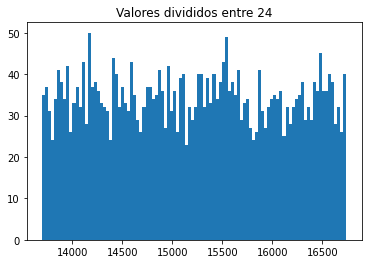

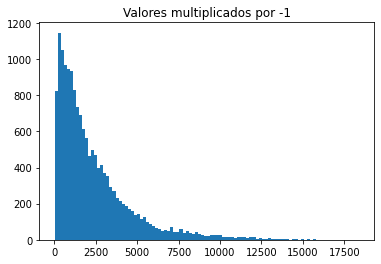

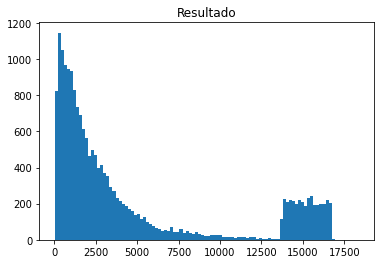

,days_employed
,mean
dob_years,
0,4611.266086
19,633.678086
20,684.944308
21,709.440930
22,860.696860
23,827.309437
24,1026.405485
25,1088.406453


In [27]:
# Abordamos los valores problemáticos
data2 = data.copy()
#data2['days_employed'] = data2.drop(index=data2[data2['days_employed'] > 300000].index)

aux1=data2.loc[data2['days_employed'] > 300000, 'days_employed']/(24)
plt.hist(aux1, bins=100)
plt.title('Valores divididos entre 24')
plt.show()

aux2=data2.loc[data2['days_employed'] < 2000, 'days_employed']*(-1)
plt.title('Valores multiplicados por -1')
plt.hist(aux2, bins=100)
plt.show()


data2.loc[data2['days_employed'] > 300000, 'days_employed'] =aux1
data2.loc[data2['days_employed'] < 2000, 'days_employed'] =aux2

plt.hist(data2['days_employed'], bins=100)
plt.title('Resultado')
plt.show()

data2.groupby(['dob_years']).agg({'days_employed': ['mean']})

Ahora  tanto los datos del rango inferior, como los del rango superior se ven mas coherentes y al agrupar por edad o calcular los valores medios, vemos que hay en la mayoría de los casos hay una correlación proporcional entre experiencia laboral y edad. Lo cual es coherente con la realidad.

In [28]:
# Comprobamos el resultado

#Revisamos si existen valores menores que 0
temp= data2[data2['days_employed']<0]['days_employed'].count()
temp=(temp/len(data2))*100
print(f"Datos menores que 0: {temp:.2f}%")

#Revisamos si existen valores nulos
temp= data2['days_employed'].isnull().sum()
temp=(temp/len(data2))*100
print(f"Datos nulos: {temp:.2f}%")


Datos menores que 0: 0.00%
Datos nulos: 10.10%


***Los arreglos antes descritos fueron aplicados satifactoriamente en nuestro nuevo DataFrame (data2)***

In [29]:
# Revisamos `dob_years` en busca de valores unicos y contamos el porcentaje
temp_df=data2['dob_years'].value_counts()
temp_df2=(data2['dob_years'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))
pd.concat([temp_df,temp_df2],axis=1).sort_index()

,dob_years,dob_years
0,101,0.47%
19,14,0.07%
20,51,0.24%
21,111,0.52%
22,183,0.85%
23,254,1.18%
24,264,1.23%
25,357,1.66%
26,408,1.90%
27,493,2.29%


<AxesSubplot:>

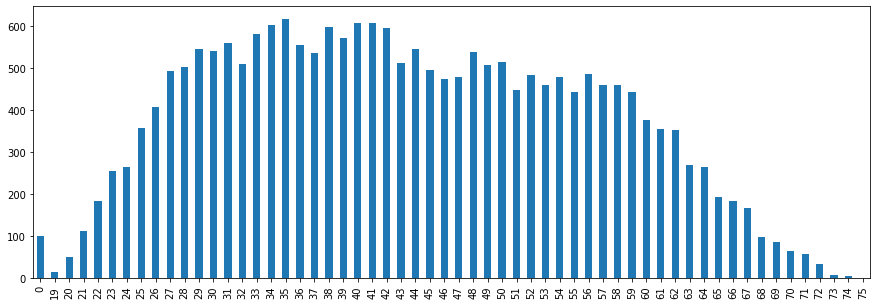

In [30]:
# Graficamos para una mejor vizualización
data2['dob_years'].value_counts().sort_index().plot(kind='bar',figsize=(15,5))

Notamos que existen 101 valores (0.47% de los datos totales) con una valor de edad de 0 y. Como vimos anteriormente, parece haber una relación proporcional entre la edad y la experiencia, por lo que intentaré calcular esta relación e inferir la edad aproximada de estas personas tomando como referencia su experiencia laboral.

<AxesSubplot:>

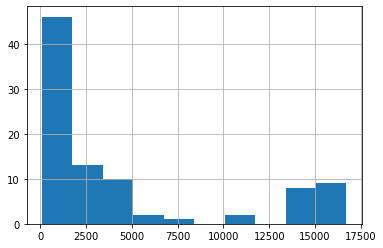

In [31]:
data2[data2['dob_years'] == 0 ]['days_employed'].hist()

<AxesSubplot:xlabel='dob_years'>

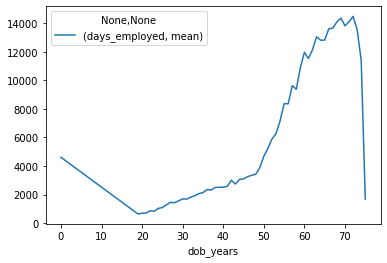

In [32]:
data2.groupby(['dob_years']).agg({'days_employed': ['mean']}).plot(kind="line")

De las 101 personas, según el histograma vemos que la experincia flutua entre 0 días y 17.000 días. En el segundo gráfico se observa don rangos claros, ***uno entre 20 y 50 y el otro entre 50 70***. Usando matematica básica, calcularé las ecuaciones de las recta para estos dos rangos y luego las aplicaré para estimar las edades que faltan.

In [33]:
#y=mx+b -- ecuación de la recta
#m=(y2-y1)/(x2-x1)

#punto1: (20 años, 685 días exp)
#punto2: (50 años, 4680 días exp)
m1=(4680-685)/(50-20)
#usando el punto1 calculamos b
#685=m*20+b (y=mx+b)
b1=685-m1*20

#punto1: (50 años, 4680 días exp)
#punto2: (70 años, 13830 días exp)
m2=(13830-4680)/(70-50)
#usando el punto1 calculamos b
#4680=m*50+b (y=mx+b)
b2=4680-m2*50

print(f'La ecuación lineal que relaciona edad con días de experiencia en el rango de 20 a 50 es:')
print(f' y={m1:.2f}x+{b1:.2f}')

print(f'La ecuación lineal que relaciona edad con días de experiencia en el rango de 50 a 70 es:')
print(f' y={m2:.2f}x+{b2:.2f}')

print(f'donde y es dias de experiencia y x es la edad')

La ecuación lineal que relaciona edad con días de experiencia en el rango de 20 a 50 es:
 y=133.17x+-1978.33
La ecuación lineal que relaciona edad con días de experiencia en el rango de 50 a 70 es:
 y=457.50x+-18195.00
donde y es dias de experiencia y x es la edad


In [34]:
#Defino una función que aplique las relaciones lineales según el valor de "days_employed"
#Aplica la primera ecuación si los días son menores a 4680 (50 años app)
#Si el resultado es menor a 18, redondea en 18
#De caso contrario aplica la segunda ecuación
def lineal(y):
    if pd.isna(y):
        return 0

    if y < 4680:
        if (y-b1)/m1<18:
            return 18
        return round((y-b1)/m1)
    
    return round((y-b2)/m2) 


data2.loc[data2['dob_years'] == 0, 'dob_years'] = data2.loc[data2['dob_years'] == 0, 'days_employed'].apply(lineal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


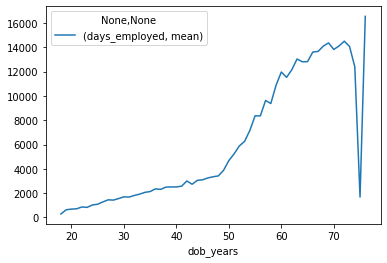

In [35]:
data2.groupby(['dob_years']).agg({'days_employed': ['mean']}).plot(kind="line")
data2.info()

Ahora si nuestro rango de edades se encuentra entre 18 y 80 años aproximadamente. La gráfica anterior muestra valores medios de dias trabajados por edad, en el caso de 75, solo hay una persona en el registro y justamente esta persona registraba un valor bajo la media, por eso en la gráfica se ve ese pequeño peak negativo.

,dob_years,dob_years
0,10,0.05%
18,12,0.06%
19,14,0.07%
20,54,0.25%
21,113,0.52%
22,191,0.89%
23,258,1.20%
24,267,1.24%
25,359,1.67%
26,410,1.90%


<AxesSubplot:>

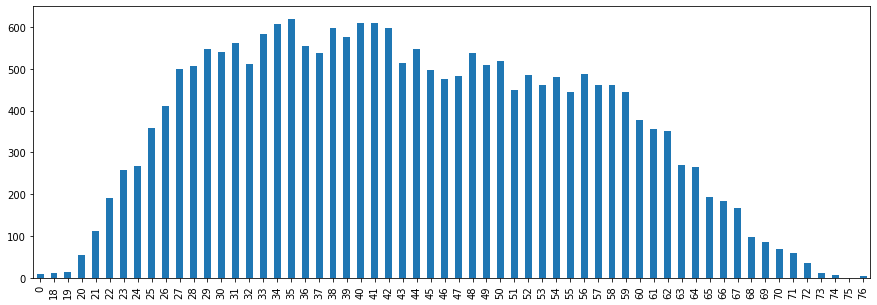

In [36]:
# Comprobamos el resultado
temp_df=data2['dob_years'].value_counts()
temp_df2=(data2['dob_years'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

display(pd.concat([temp_df,temp_df2],axis=1).sort_index())
data2['dob_years'].value_counts().sort_index().plot(kind='bar',figsize=(15,5))

Siguen apareciendo datos de edad con 0, esto es seguramente a que a la vez que habia un 0 en 'dob_years', 'en days_employed' habian datos nulos y la función no se pudo aplicar. Miremos mas a detalle.

In [37]:
data2[data2['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1890,0,NaN,0,bachelors_degree,0,unmarried,4,F,employee,0,NaN,housing
2284,0,NaN,0,secondary_education,1,widow / widower,2,F,retiree,0,NaN,property
4064,1,NaN,0,secondary_education,1,civil partnership,1,M,business,0,NaN,housing renovation
5014,0,NaN,0,secondary_education,1,married,0,F,business,0,NaN,buy real estate
6411,0,NaN,0,bachelors_degree,0,civil partnership,1,F,retiree,0,NaN,wedding ceremony
6670,0,NaN,0,bachelors_degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate
8574,0,NaN,0,secondary_education,1,married,0,F,employee,0,NaN,property
12403,3,NaN,0,secondary_education,1,married,0,M,employee,0,NaN,transactions with commercial real estate
13741,0,NaN,0,secondary_education,1,civil partnership,1,F,employee,0,NaN,having a wedding
19829,0,NaN,0,secondary_education,1,married,0,F,employee,0,NaN,housing


Efectivamentem son 10 filas que no tienen información de edad, experiencia ni ingresos. Poco se puede hacer con esta data, así que dado que solo son 10 datos, procederé a descartarla.

<AxesSubplot:>

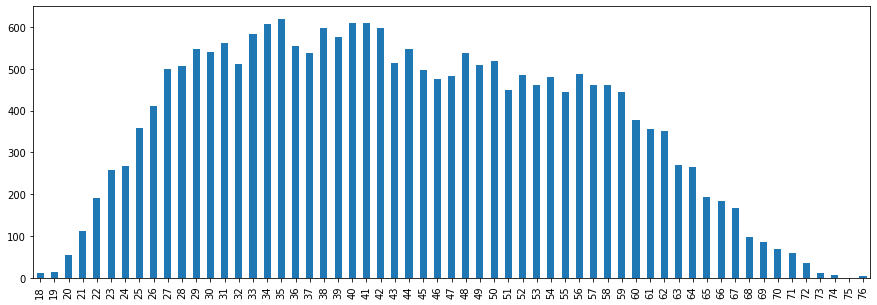

In [38]:
# Eliminando las filas del DF con valores de 'dob_years'=0
data2 = data2.drop(data2[data2['dob_years'] == 0].index)
#Chequeamos que todo este correcto
data2['dob_years'].value_counts().sort_index().plot(kind='bar',figsize=(15,5))

Los datos de edad ya son validos(entre 18 y 76)

Revistamos ahora la columna `family_status`

In [39]:
# Veamos los valores de la columna
temp_df=data2['family_status'].value_counts()
temp_df2=(data2['family_status'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)

,family_status,family_status
married,12376,57.52%
civil partnership,4174,19.40%
unmarried,2812,13.07%
divorced,1194,5.55%
widow / widower,959,4.46%


No se visualizan problemas en esta columna. Ahora revisamos la columna `gender`.

In [40]:
# Veamos los valores en la columna
temp_df=data2['gender'].value_counts()
temp_df2=(data2['gender'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)

,gender,gender
F,14228,66.13%
M,7286,33.86%
XNA,1,0.00%


En esta columna se aprecia 1 valor 'XNA' el cual podria ser alguien que se identifica como "no binario", proceré a reetiquetarlo con su nombre correspondiente.

In [41]:
# Eliminamos
data2['gender']=data2['gender'].replace('XNA', 'no_binario')

In [42]:
# Compruebamos
temp_df=data2['gender'].value_counts()
temp_df2=(data2['gender'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)

,gender,gender
F,14228,66.13%
M,7286,33.86%
no_binario,1,0.00%


Ahora revisamos la columna `income_type`.

In [43]:
# Veamos los valores en la columna
temp_df=data2['income_type'].value_counts()
temp_df2=(data2['income_type'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)

,income_type,income_type
employee,11114,51.66%
business,5083,23.63%
retiree,3853,17.91%
civil servant,1459,6.78%
entrepreneur,2,0.01%
unemployed,2,0.01%
student,1,0.00%
paternity / maternity leave,1,0.00%


In [44]:
#Transfomo los espacios a "_" y las comillas las elimino 
#para estandarizar el texto en formato snake_case
data2['income_type']=data2['income_type'].str.replace(' / ', '-')
data2['income_type']=data2['income_type'].str.replace(' ', '_')

# Veamos los valores en la columna
temp_df=data2['income_type'].value_counts()
temp_df2=(data2['income_type'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)

,income_type,income_type
employee,11114,51.66%
business,5083,23.63%
retiree,3853,17.91%
civil_servant,1459,6.78%
entrepreneur,2,0.01%
unemployed,2,0.01%
student,1,0.00%
paternity-maternity_leave,1,0.00%


Ahora veamos si hay duplicados en nuestros datos.

In [45]:
# Comprobando los duplicados

aux_print1= data2.duplicated().sum()
aux_print2= data2.duplicated().sum()/len(data2)

print(f'Hay {aux_print1} filas duplicadas que corresponden a un {aux_print2:.2%} de las filas totales ')

Hay 71 filas duplicadas que corresponden a un 0.33% de las filas totales 


***Hay 71 filas duplicadas, correspondiente al 0.33% de las filas totales, como son pocas en relación a la muestra total, procederé a eliminarlas***

In [46]:
# Borramos duplicados
data2 = data2.drop_duplicates().reset_index(drop = True)

In [47]:
# Última comprobación para ver si tenemos duplicados
aux_print1= data2.duplicated().sum()
aux_print2= data2.duplicated().sum()/len(data2)

print(f'Hay {aux_print1} filas duplicadas que corresponden a un {aux_print2:.2%} de las filas totales ')

Hay 0 filas duplicadas que corresponden a un 0.00% de las filas totales 


In [48]:
# Comprueba el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones
data2.shape

(21444, 12)

Tras las consideraciones mencionadas anteriormente, nuestro conjunto de datos paso de tener 21525 filas, a tener 17816 filas.
Por lo que en el proceso de depuración se apartaron 3709 filas (17,2% de las filas originales). Esta es una cantidad de filas significativas, sin embargo, de conservarlas, iban a entorpecer nuestro trabajo de analisis

***En resumen, se modifico lo siguiente:***

***1. En 'education' se transformó todo a minuscula, y se estandarizo con snake_case***

***2. Se corrigio valores erroneos en 'children','dob_years' y 'gender'***

***3. Se arreglaron valores negativos y mal escalados en 'days_employed'***

***4. Se eliminaron 71 filas duplicadas***

# Trabajar con valores ausentes

Para trabajar con datos ausentes, utilizaré los siguientes diccionarios para evaluar rapidamente la media y la mediana de ingresos mensuales de los datos no nulos para determinados rangos. Luego de esto, completaré con el dato que corresponda.

`{'total_income': ['mean','median']}`

In [49]:
# Diccionario
dict_total_income={'total_income': ['mean','median']}

### Restaurando valores ausentes en `total_income`

Como vimos anteriormente, tenemos valores ausentes en las columnas `days_employed` y `total_income`.
Comenzaremos determinando un valor adecuado de `total_income` para reemplazar en los datos nulos,para esto, determinaremos los datos medios y medianos para distintos rangos y evaluaremos que dato nos corresponde mas reemplzarar.

In [50]:
data2['dob_years'].min()
data2['dob_years'].max()

76

In [51]:
# Vamos a escribir una función que calcule la categoría de edad
def rango_edad(columna):
    edad = columna['dob_years']
    
    if edad >=18 and edad <=30:
        return '18-30'
    if edad >=31 and edad <=40:
        return '31-40'
    if edad >=41 and edad <=50:
        return '41-50'
    if edad >=51 and edad <=60:
        return '51-60'
    if edad >60:
        return '60+'    

In [52]:
# Probamos si la función funciona bien

col_test = pd.Series(data=[25], index=['dob_years'])
print(rango_edad(col_test))

col_test = pd.Series(data=[35], index=['dob_years'])
print(rango_edad(col_test))

col_test = pd.Series(data=[45], index=['dob_years'])
print(rango_edad(col_test))

col_test = pd.Series(data=[55], index=['dob_years'])
print(rango_edad(col_test))

col_test = pd.Series(data=[65], index=['dob_years'])
print(rango_edad(col_test))

18-30
31-40
41-50
51-60
60+


In [53]:
# Creamos una nueva columna basada en la función
data2['rango_edad'] = data2.apply(rango_edad, axis=1)

In [54]:
# Comprobamos los valores en la nueva columna
data2.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,rango_edad
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,purchase of the house,41-50
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,car purchase,31-40
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,purchase of the house,31-40
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,supplementary education,31-40
4,0,14177.753002,53,secondary_education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,51-60


Los ingresos suelen depender del ***tipo de empleo, género y en menor grado del rango de edad de la persona***, es por eso que para rellenar los valores ausentes de la columna `total_income`, revisaré los ingresos promedios y medianos en dichas categorias.

In [55]:
#Creo una tabla auxiliar y elimino los datos ausentes
data2_aux=data2.drop(data2[data2['total_income'].isna()].index)
data2_aux.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,rango_edad
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,purchase of the house,41-50
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,car purchase,31-40
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,purchase of the house,31-40
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,supplementary education,31-40
4,0,14177.753002,53,secondary_education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,51-60


In [56]:
# Examino los valores medios y medianos segun empleo
data2_aux.groupby('income_type').agg(dict_total_income)

total_income            
                                   mean      median
income_type                                        
business                   32386.793835  27577.2720
civil_servant              27343.729582  24071.6695
employee                   25820.841683  22815.1035
entrepreneur               79866.103000  79866.1030
paternity-maternity_leave   8612.661000   8612.6610
retiree                    21940.394503  18962.3180
student                    15712.260000  15712.2600
unemployed                 21014.360500  21014.3605

In [57]:
# Examino los valores medios y medianos segun nivel educacional
data2_aux.groupby('education').agg(dict_total_income)

total_income            
                             mean      median
education                                    
bachelors_degree     33142.802434  28054.5310
graduate_degree      27960.024667  25161.5835
primary_education    21144.882211  18741.9760
secondary_education  24594.503037  21836.5830
some_college         29045.443644  25618.4640

In [58]:
# Examino los valores medios y medianos segun el rango de edad
data2_aux.groupby('gender').agg(dict_total_income)

total_income           
                    mean     median
gender                             
F           24655.604757  21464.845
M           30907.144369  26834.295
no_binario  32624.825000  32624.825

In [59]:
# Examino los valores medios y medianos segun el rango de edad
data2_aux.groupby('rango_edad').agg(dict_total_income)

total_income            
                    mean      median
rango_edad                          
18-30       25837.847824  23000.1670
31-40       28364.891324  24821.1555
41-50       28382.310002  24569.9680
51-60       25475.890009  22054.0650
60+         23069.279942  19644.2245

In [60]:
# Examinamos los valores medios y medianos segun empleo y rango de edad
pd.set_option('display.max_rows', None)
data2_aux.groupby(['income_type','education','rango_edad','gender']).agg(dict_total_income)

total_income  \
                                                                             mean   
income_type               education           rango_edad gender                     
business                  bachelors_degree    18-30      F           30047.177875   
                                                         M           39431.423383   
                                              31-40      F           35030.382415   
                                                         M           45821.377503   
                                              41-50      F           37135.559722   
                                                         M           52417.059369   
                                              51-60      F           40509.639881   
                                                         M           46541.863737   
                                              60+        F           32872.322500   
                                                         M           46955.423550   
                          primary_education   18-30      F           12663.581000   
                                                         M           28738.046571   
                                              31-40      F           25559.337222   
                                                         M           25547.389500   
                                              41-50      F           29973.901000   
                                                         M           27568.466000   
                                              51-60      F           15518.346000   
                                                         M           28388.630000   
                          secondary_education 18-30      F           23783.558500   
                                                         M           30448.428340   
                                              31-40      F           26160.635364   
                                                         M           33761.995882   
                                              41-50      F           26340.259413   
                                                         M           36069.623876   
                                              51-60      F           27005.341778   
                                                         M           29766.424121   
                                              60+        F           29229.884122   
                                                         M           27338.591269   
                          some_college        18-30      F           24823.924104   
                                                         M           32221.555923   
                                                         no_binario  32624.825000   
                                              31-40      F           31755.103961   
                                                         M           34644.676481   
                                              41-50      F           43012.126125   
                                                         M           38850.164533   
                                              51-60      F           35888.308500   
                                                         M           29126.658750   
                                              60+        F           30337.601500   
civil_servant             bachelors_degree    18-30      F           24398.237262   
                                                         M           35077.422471   
                                              31-40      F           29108.880339   
                                                         M           41643.088894   
                                              41-50      F           29946.868777   
                                                         M           43431.753452   
                                              51-60      F           29071

En base a la información anterior, el tipo de empleo tiene un impacto significativo en el salario, luego por el tipo de educación, seguido por el género y en menor grado, por la edad. Para completar los datos ausentes de la columna `total_income` usaré la mediana correspondiente a cada uno de estos rangos segun corresponda. Para realizar esta tarea, construiré una función que estime la renta en base a los datos de entrada.


In [61]:
#  Función que usaremos para completar los valores ausentes
def valores_ausentes(df):
    empleo=df['income_type']
    educacion=df['education']
    edad=df['rango_edad']
    genero=df['gender']


    try:
        #Intenta aplicar mediana por tipo de empleo, educacion, rango de edad y genero
        df2=data2_aux.groupby(['income_type','education','rango_edad','gender']).agg(dict_total_income)
        media =df2.loc[(empleo,educacion, edad, genero), ('total_income','median')]
        return media
    except:
        try:
            #Si falla, intenta aplicar mediana por tipo de empleo, educación y genero
            df2=data2_aux.groupby(['income_type','education','gender']).agg(dict_total_income)
            media =df2.loc[(empleo,educacion, genero), ('total_income','median')]
            return media
        except:
            try:
                #Si falla, intenta aplicar mediana por tipo de empleo y educación
                df2=data2_aux.groupby(['income_type','education']).agg(dict_total_income)
                media =df2.loc[(empleo,educacion), ('total_income','median')]
                return media
            except:
                try:
                    #Si falla, intenta aplicar mediana solo por tipo de empleo
                    df2=data2_aux.groupby(['income_type']).agg(dict_total_income)
                    media =df2.loc[(empleo), ('total_income','median')]
                    return media
                except:
                    #Si todo falla, asigna un -1
                    media = -1
                    return media


In [62]:
# Comprobación de la función

df_test = pd.DataFrame({'income_type': ['business', 'employee', 'entrepreneur','entrepreneur', 'student','student'], 
        'education': ['some_college', 'secondary education', 'bachelor\'s degree','primary education', 'primary education','secondary education'],
        'rango_edad': ['20-29', '0-19', '30-39','20-29', '20-29','40-49'], 
        'gender': ['M', 'M', 'F','M', 'M','F']})

df_test['renta_estimada']=df_test.apply(valores_ausentes, axis=1)
df_test

,income_type,education,rango_edad,gender,renta_estimada
0,business,some_college,20-29,M,30606.7090
1,employee,secondary education,0-19,M,22815.1035
2,entrepreneur,bachelor's degree,30-39,F,79866.1030
3,entrepreneur,primary education,20-29,M,79866.1030
4,student,primary education,20-29,M,15712.2600
5,student,secondary education,40-49,F,15712.2600


La función funciona correctamente. Esta función, en base a los datos disponibles, calcula la mediana correspondiente a los parametros `income_type` ,`education`, `rango_edad` y `gender`. Si no hay datos suficientes, entonces calcula la mediana con `income_type` ,`education` y `gender` o solo como `income_type` y `genre`, si falla nuevamente, entonces asigna solo la mediana correspondiente al parametro `income_type`. Por último, si todo falla, asigna un -1.

In [63]:
#Aplicamos función a nuestro DataFrame
valores_reemplazo = data2[data2['total_income'].isna()].apply(valores_ausentes, axis=1)
data2['total_income'] = data2['total_income'].fillna(valores_reemplazo)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21444 entries, 0 to 21443
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21444 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21444 non-null  int64  
 3   education         21444 non-null  object 
 4   education_id      21444 non-null  int64  
 5   family_status     21444 non-null  object 
 6   family_status_id  21444 non-null  int64  
 7   gender            21444 non-null  object 
 8   income_type       21444 non-null  object 
 9   debt              21444 non-null  int64  
 10  total_income      21444 non-null  float64
 11  purpose           21444 non-null  object 
 12  rango_edad        21444 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Segun la informacion de nuestro DataFrame actualizado, ya no temos valores nulos en la columna `total_income`. Para asegurarnos que todo este correcto, miraremos en detalle los datos comparando con nuestra tabla auxiliar sin datos nulos usada en el punto anterior

In [64]:
# Comprueba si tenemos algún error

a=data2.groupby(['income_type','education','rango_edad','gender']).agg({'total_income': ['median']})
b=data2_aux.groupby(['income_type','education','rango_edad','gender']).agg({'total_income': ['median']})

pd.concat([a,b], axis=1,keys=['data2','Sin datos nulos'])

data2  \
                                                                    total_income   
                                                                          median   
income_type               education           rango_edad gender                    
business                  bachelors_degree    18-30      F            26911.0455   
                                                         M            33526.1300   
                                              31-40      F            31163.5910   
                                                         M            37180.9180   
                                              41-50      F            31592.6980   
                                                         M            40892.0150   
                                              51-60      F            31789.9265   
                                                         M            39888.5070   
                                              60+        F            29541.9080   
                                                         M            32235.3180   
                          primary_education   18-30      F            12663.5810   
                                                         M            21301.3680   
                                              31-40      F            21441.9210   
                                                         M            25547.3895   
                                              41-50      F            29973.9010   
                                                         M            26543.5395   
                                              51-60      F            15518.3460   
                                                         M            26144.4830   
                          secondary_education 18-30      F            21583.5925   
                                                         M            27219.7320   
                                              31-40      F            23552.2690   
                                                         M            30172.2725   
                                              41-50      F            23629.2490   
                                                         M            29628.7955   
                                              51-60      F            23300.9410   
                                                         M            26769.7470   
                                              60+        F            27706.7690   
                                                         M            29193.1930   
                          some_college        18-30      F            21459.2640   
                                                         M            29642.6910   
                                                         no_binario   32624.8250   
                                              31-40      F            29643.7870   
                                                         M            34110.7740   
                                              41-50      F            41941.4115   
                                                         M            34657.8350   
                                              51-60      F            36106.3985   
                                                         M            25097.3910   
                                              60+        F            30337.6015   
                                                         M            30606.7090   
civil_servant             bachelors_degree    18-30      F            22599.9360   
                                                         M            33957.2960   
                                              31-40      F            24916.1650   
                                                         M            35089.9160   
                                              41-50      F            27794.7720   
                                           

Los datos nulos fueron reemplazados correctamente.

###  Restaurando valores en `days_employed`

Al igual que el caso anterior, comienzo creado una tabla sin valores ausentes, para luego calcular medias y medianas para determinados rangos.

In [65]:
#Creo una tabla auxiliar y elimino los datos ausentes
data2_aux=data2.drop(data2[data2['days_employed'].isna()].index)
data2_aux.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,rango_edad
0,1,8437.673028,42,bachelors_degree,0,married,0,F,employee,0,40620.102,purchase of the house,41-50
1,1,4024.803754,36,secondary_education,1,married,0,F,employee,0,17932.802,car purchase,31-40
2,0,5623.422610,33,secondary_education,1,married,0,M,employee,0,23341.752,purchase of the house,31-40
3,3,4124.747207,32,secondary_education,1,married,0,M,employee,0,42820.568,supplementary education,31-40
4,0,14177.753002,53,secondary_education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,51-60


In [66]:
# Distribución de las medias y medianas de `days_employed` en función de los parámetros identificados
data2_aux.groupby(['income_type','education','rango_edad','gender']).agg({'days_employed': ['mean','median']})

days_employed  \
                                                                             mean   
income_type               education           rango_edad gender                     
business                  bachelors_degree    18-30      F            1257.514420   
                                                         M            1180.144134   
                                              31-40      F            1870.991165   
                                                         M            1739.934327   
                                              41-50      F            2602.200279   
                                                         M            2217.432587   
                                              51-60      F            2909.090402   
                                                         M            2394.136769   
                                              60+        F            4720.056765   
                                                         M            3763.411334   
                          primary_education   18-30      F            1030.219648   
                                                         M             933.604396   
                                              31-40      F            2023.052939   
                                                         M            2992.930739   
                                              41-50      F             653.909399   
                                                         M            1852.907094   
                                              51-60      F             863.272579   
                                                         M            5739.498306   
                          secondary_education 18-30      F            1261.679489   
                                                         M            1230.348115   
                                              31-40      F            1927.497757   
                                                         M            2077.378828   
                                              41-50      F            2584.740073   
                                                         M            2403.374095   
                                              51-60      F            3104.762608   
                                                         M            2829.489326   
                                              60+        F            4046.248926   
                                                         M            2153.011473   
                          some_college        18-30      F             947.620408   
                                                         M            1012.337314   
                                                         no_binario   2358.600502   
                                              31-40      F            1458.292922   
                                                         M            1434.107685   
                                              41-50      F            2812.723507   
                                                         M            2704.451142   
                                              51-60      F            1497.249450   
                                                         M            1452.109082   
                                              60+        F             927.335994   
civil_servant             bachelors_degree    18-30      F            1515.480587   
                                                         M            1834.772134   
                                              31-40      F            2745.920884   
                                                         M            3592.146604   
                                              41-50      F            4050.303138   
                                                         M            3846.469374   
                                              51-60      F            436

In [67]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21444 entries, 0 to 21443
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21444 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21444 non-null  int64  
 3   education         21444 non-null  object 
 4   education_id      21444 non-null  int64  
 5   family_status     21444 non-null  object 
 6   family_status_id  21444 non-null  int64  
 7   gender            21444 non-null  object 
 8   income_type       21444 non-null  object 
 9   debt              21444 non-null  int64  
 10  total_income      21444 non-null  float64
 11  purpose           21444 non-null  object 
 12  rango_edad        21444 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


De forma similar al punto anterior, agrupe por tipo de trabajo, educación, rango de edad y género y calcule las medias y las medianas. Para este caso, dado que se contabilizan días trabajados, a diferencia de los sueldos, es mas dificil que un valor se salga de la media, es por eso que para esta variable, se considerará la media

A continuación construire una función muy similar a la usada en el punto anterior

In [68]:
#  Función que usaremos para completar los valores ausentes
def valores_ausentes2(df):
    empleo=df['income_type']
    educacion=df['education']
    edad=df['rango_edad']
    genero=df['gender']



    try:
        #Intenta aplicar mediana por tipo de empleo, educacion, rango de edad y genero
        df2=data2_aux.groupby(['income_type','education','rango_edad','gender']).agg({'days_employed': ['mean','median']})
        media =df2.loc[(empleo,educacion, edad, genero), ('days_employed','mean')]
        return media
    except:
        try:
            #Si falla, intenta aplicar mediana por tipo de empleo, educación y genero
            df2=data2_aux.groupby(['income_type','education','gender']).agg({'days_employed': ['mean','median']})
            media =df2.loc[(empleo,educacion, genero), ('days_employed','mean')]
            return media
        except:
            try:
                #Si falla, intenta aplicar mediana por tipo de empleo y educación
                df2=data2_aux.groupby(['income_type','education']).agg({'days_employed': ['mean','median']})
                media =df2.loc[(empleo,educacion), ('days_employed','mean')]
                return media
            except:
                try:
                    #Si falla, intenta aplicar mediana solo por tipo de empleo
                    df2=data2_aux.groupby(['income_type']).agg({'days_employed': ['mean','median']})
                    media =df2.loc[(empleo), ('days_employed','mean')]
                    return media
                except:
                    #Si todo falla, asigna un -1
                    media = -1
                    return media


In [69]:
# Comprobación de la función

df_test = pd.DataFrame({'income_type': ['business', 'employee', 'entrepreneur','entrepreneur', 'student','student'], 
        'education': ['some_college', 'secondary education', 'bachelor\'s degree','primary education', 'primary education','secondary education'],
        'rango_edad': ['20-29', '0-19', '30-39','20-29', '20-29','40-49'], 
        'gender': ['M', 'M', 'F','M', 'M','F']})

df_test['dias_estimados']=df_test.apply(valores_ausentes2, axis=1)
df_test

,income_type,education,rango_edad,gender,dias_estimados
0,business,some_college,20-29,M,1405.486238
1,employee,secondary education,0-19,M,2326.499216
2,entrepreneur,bachelor's degree,30-39,F,520.848083
3,entrepreneur,primary education,20-29,M,520.848083
4,student,primary education,20-29,M,578.751554
5,student,secondary education,40-49,F,578.751554


In [70]:
#Aplicamos función a nuestro DataFrame
valores_reemplazo2 = data2[data2['days_employed'].isna()].apply(valores_ausentes2, axis=1)
data2['days_employed'] = data2['days_employed'].fillna(valores_reemplazo2)

In [71]:
# Reemplazar valores ausentes
a=data2.groupby(['income_type','education','rango_edad','gender']).agg({'days_employed': ['mean']})

b=data2_aux.groupby(['income_type','education','rango_edad','gender']).agg({'days_employed': ['mean']})

pd.concat([a,b], axis=1,keys=['data2','data2_aux'])


data2  \
                                                                    days_employed   
                                                                             mean   
income_type               education           rango_edad gender                     
business                  bachelors_degree    18-30      F            1257.514420   
                                                         M            1180.144134   
                                              31-40      F            1870.991165   
                                                         M            1739.934327   
                                              41-50      F            2602.200279   
                                                         M            2217.432587   
                                              51-60      F            2909.090402   
                                                         M            2394.136769   
                                              60+        F            4720.056765   
                                                         M            3763.411334   
                          primary_education   18-30      F            1030.219648   
                                                         M             933.604396   
                                              31-40      F            2023.052939   
                                                         M            2992.930739   
                                              41-50      F             653.909399   
                                                         M            1852.907094   
                                              51-60      F             863.272579   
                                                         M            5739.498306   
                          secondary_education 18-30      F            1261.679489   
                                                         M            1230.348115   
                                              31-40      F            1927.497757   
                                                         M            2077.378828   
                                              41-50      F            2584.740073   
                                                         M            2403.374095   
                                              51-60      F            3104.762608   
                                                         M            2829.489326   
                                              60+        F            4046.248926   
                                                         M            2153.011473   
                          some_college        18-30      F             947.620408   
                                                         M            1012.337314   
                                                         no_binario   2358.600502   
                                              31-40      F            1458.292922   
                                                         M            1434.107685   
                                              41-50      F            2812.723507   
                                                         M            2704.451142   
                                              51-60      F            1497.249450   
                                                         M            1452.109082   
                                              60+        F             927.335994   
                                                         M            1405.486238   
civil_servant             bachelors_degree    18-30      F            1515.480587   
                                                         M            1834.772134   
                                              31-40      F            2745.920884   
                                                         M            3592.146604   
                                              41-50      F            4050.303138

Datos aplicados correctamente.

In [72]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21444 entries, 0 to 21443
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21444 non-null  int64  
 1   days_employed     21444 non-null  float64
 2   dob_years         21444 non-null  int64  
 3   education         21444 non-null  object 
 4   education_id      21444 non-null  int64  
 5   family_status     21444 non-null  object 
 6   family_status_id  21444 non-null  int64  
 7   gender            21444 non-null  object 
 8   income_type       21444 non-null  object 
 9   debt              21444 non-null  int64  
 10  total_income      21444 non-null  float64
 11  purpose           21444 non-null  object 
 12  rango_edad        21444 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


***Finalmente, con 21444 filas, nuestros DataFrame (data2) se encuentra con 0 datos nulos y listo para analisis.***

## Clasificación de datos

Necesitamos averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo.

Para poder ver interpretar mas claramente la información que disponemos, es necesario clasificar por numero de hijos `children`.
Tambien puede ser util clasificar por `family_status`, `income_type`, `purpose` y `total_income`.

In [73]:
#Datos seleccionados para la clasificación
data2[['children','family_status','income_type','purpose','total_income']].head(5)


,children,family_status,income_type,purpose,total_income
0,1,married,employee,purchase of the house,40620.102
1,1,married,employee,car purchase,17932.802
2,0,married,employee,purchase of the house,23341.752
3,3,married,employee,supplementary education,42820.568
4,0,civil partnership,retiree,to have a wedding,25378.572


Comprabamos valores unicos

In [74]:
# Comprobar los valores únicos
display(data2['education'].unique())
display(data2['family_status'].unique())
display(data2['income_type'].unique())
display(data2['purpose'].unique())

array(['bachelors_degree', 'secondary_education', 'some_college',
       'primary_education', 'graduate_degree'], dtype=object)

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

array(['employee', 'retiree', 'business', 'civil_servant', 'unemployed',
       'entrepreneur', 'student', 'paternity-maternity_leave'],
      dtype=object)

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [75]:
len(data2['purpose'].unique())

38

Los valores de las columnas `education`, `family_status` y`income_type` son correctos, sin embargo en la columna `purpose` hay valores que son equivalentes.

En resumen, de los 38 valores unicos de la columna `purpose`, podemos simplificar a solo 4 categorias principales, las cuales son:  
***House, Car,Education, Wedding.***

In [76]:
# Escribimos una función para clasificar los datos en función de los 4 temas comunes
def clasificar(data):
    purpose= data['purpose']
  #purpose.str.contains('house'):  
    if ('hous' in purpose) or ('estate' in purpose) or ('property' in purpose):
        return 'House'
    if ('car' in purpose):
        return 'Car'
    if ('educat' in purpose) or ('university' in purpose):
        return 'Education'
    if ('wedding' in purpose):
        return 'Wedding'
    else:   
        return purpose

In [77]:
# Creamos una columna con las categorías y cuenta los valores en ellas
data2['proposito']=data2.apply(clasificar, axis=1)
data2['proposito'].unique()

array(['House', 'Car', 'Education', 'Wedding'], dtype=object)

***Ahora de las 38 categorias diferentes en 'purpose' hemos reducido a solamente cuatro***

Revisamos ahora los datos de renta mensual `total_income`, pero dado que estos son datos númericos, debemos clasificar en distinto rangos.

<AxesSubplot:>

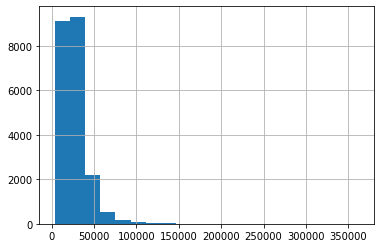

In [78]:
# Revisar todos los datos numéricos en la columna seleccionada para la clasificación
data2['total_income'].hist(bins=20)

In [79]:
# Obtenemos estadísticas resumidas para la columna
data2['total_income'].describe()

count     21444.000000
mean      26485.664564
std       15759.822006
min        3306.762000
25%       17191.310750
50%       23261.468000
75%       31592.698000
max      362496.645000
Name: total_income, dtype: float64

La columna  `total_income ` es importante ya que indica el sueldo mensual del quien solicita el credito y por consecuencia, de su capacidad para pagarlo posteriormente. Para simplificar el analisis, crearé distintos rangos de renta.

In [80]:
# Función para clasificar en diferentes grupos numéricos basándose en rangos
def rango_renta(data):
    renta=data['total_income']
    
    if renta<20000:
        return '0-20000'
    if renta>=20000 and renta<30000:
        return '20000-30000'
    if renta>=30000 and renta<40000:
        return '30000-40000'
    if renta>=40000 and renta<50000:
        return '40000-50000'
    if renta>50000:
        return '50000+'

In [81]:
# Creamos una columna con categorías
data2['rango_renta']=data2.apply(rango_renta, axis=1)

In [82]:
# Contar los valores de cada categoría para ver la distribución
temp_df=data2['rango_renta'].value_counts()
temp_df2=(data2['rango_renta'].value_counts(normalize=True)).apply(lambda x: '{:.2%}'.format(x))

pd.concat([temp_df,temp_df2],axis=1)

,rango_renta,rango_renta
0-20000,7772,36.24%
20000-30000,7443,34.71%
30000-40000,3400,15.86%
40000-50000,1508,7.03%
50000+,1321,6.16%


## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [83]:
# Comprueba los datos sobre los hijos y los pagos puntuales
def porcentaje(x):
    return round((x.sum() / x.count()) * 100, 2)
    
data2.groupby('children').agg({'debt': ['sum','count',porcentaje]})
# Calcular la tasa de incumplimiento en función del número de hijos

debt                  
           sum  count porcentaje
children                        
0         1063  14083       7.55
1          445   4854       9.17
2          202   2128       9.49
3           27    329       8.21
4            4     41       9.76
5            0      9       0.00

**Conclusión**

En base a los datos, solo las personas sin hijos parecieran mostrar una menor probabiliadad a endeudarse. En promedio, independiente del número de hijos, el porcentaje de gente endeudada esta entre un 8 a un 10%. En el caso de las 9 personas con 5 hijos,ninguna de ellas se encuentra endeudada, pero es dificil concluir respecto a este último dato, debido a que representa un numero muy pequeño de la muestra.

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [84]:
# Comprobamos los datos del estado familiar, los pagos a tiempo 
#y la tasa de incumplimiento basada en el estado familiar

data2.groupby('family_status').agg({'debt': ['sum','count',porcentaje]})

debt                  
                   sum  count porcentaje
family_status                           
civil partnership  388   4148       9.35
divorced            85   1194       7.12
married            931  12335       7.55
unmarried          274   2809       9.75
widow / widower     63    958       6.58

**Conclusión**

Respecto a la muestra, la gente soltera (unmarried) y las con union civil (civil partnership) presentan un mayor porcentaje de deuda (10% app).

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [85]:
# Comprobamos los datos del nivel de ingresos, los pagos a tiempo 
#y la tasa de incumplimiento basada en el nivel de ingresos

display(data2.groupby('rango_renta').agg({'debt': ['sum','count',porcentaje]}))

debt                 
             sum count porcentaje
rango_renta                      
0-20000      647  7772       8.32
20000-30000  644  7443       8.65
30000-40000  255  3400       7.50
40000-50000  103  1508       6.83
50000+        92  1321       6.96

**Conclusión**

Respecto a la renta mensual, pareciera que mientras mayor es el ingreso, menor es la probabilidad de presentar endeudamiento.

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [86]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos
data2.groupby('proposito').agg({'debt': ['sum','count',porcentaje]})


debt                  
           sum  count porcentaje
proposito                       
Car        403   4306       9.36
Education  370   4013       9.22
House      782  10803       7.24
Wedding    186   2322       8.01

**Conclusión**

Finalmente, respecto al proposito para obtener un prestamo, según la información, las personas que lo solicitan para comprar un automovil, tienden a presentar una mayor probabilidad al endeudamiento, mientras que las que lo piden para adquirir una casa, son las mas confiables.

# Conclusión general 

***La data proporcionada para el analisis, disponia de 21524 filas, sin embargo, existian varias filas y columnas, tanto con datos nulos como con datos duplicados o incorrectos***

En resumen, de los datos se corrigio lo siguiente:

1.Se estandarizó el formato de `education` todo en minuscula y snake_case  
2.En la columna `children` habian valores de -1 y 20, se asumieron errores de tipeo. ***-1 se igualo a 1 y 20 se igualo a 2.***
3.Se corrigieron valores de `days_employed` mal escalados.
4.En `dob_years` habian 110 filas con edad de 0 años, se procede a calcular la edad estimada tomando como base los dias de experincia (`days_employed`)
5.En `gender` hay una fila con una valor XNA, la cual fue reetiquetada como "no-binario"
6.Buscamos duplicados implicitos, encontramos 71 filas(0.4%). Las borramos.  
7.Se calculó la mediana de datos no nulos de la columna `total_income` según el tipo de empleo, educación, genero y rango de edad para luego asignar según correspondiese.  
8.Se calculó la media de datos no nulos de la columna `days_employed` según el tipo de empleo, educación, genero y rango de edad para luego asignar según correspondiese.  

***Luego de todo lo anterior, nuestro conjunto de datos paso de tener 21524 filas a 21444.***

# Conclusiones finales

***1.Solo las personas sin hijos tienden a tener una menor probabilidad a endeudarse.
2.La gente soltera (unmarried) y las con union civil (civil partnership) presentan un mayor porcentaje de deuda  
3.Mientras mayor es el ingreso, menor es la probabilidad de presentar endeudamiento  
4.Las personas que solicitan un prestamo para comprar un automovil, tienen una mayor probabilidad al endeudamiento, mientras que las que lo piden para adquirir una casa, son las mas confiables.***